In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\giova\Desktop\Corso Epicode\PYTHON\owid_covid_data.csv')

In [34]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [ ]:
##Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [8]:
print(df.shape)  # Dimensioni del DataFrame
print(df.info())  # Informazioni sui dati
print(df.describe())  # Statistiche descrittive

(429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-nu

In [ ]:
##Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [12]:
casi_per_continente = df.groupby('continent')['total_cases'].sum()
print(casi_per_continente)

continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
Name: total_cases, dtype: float64


In [ ]:
##Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [14]:
# Raggruppa per continente e calcola il valore massimo, la media e la percentuale sul totale mondiale
casi_per_continente = df.groupby('continent')['total_cases'].agg(['max', 'mean'])

# Calcola il numero totale di casi nel mondo
totale_casi_mondiale = df['total_cases'].sum()

# Calcola la percentuale di casi per continente sul totale mondiale
casi_per_continente['percentuale_sul_totale'] = (casi_per_continente['mean'] / totale_casi_mondiale) * 100

# Visualizza i risultati
print(casi_per_continente)

                       max          mean  percentuale_sul_totale
continent                                                       
Africa           4072765.0  1.531879e+05                0.000005
Asia            99373219.0  3.205055e+06                0.000106
Europe          38997490.0  2.773171e+06                0.000091
North America  103436829.0  1.851468e+06                0.000061
Oceania         11861161.0  2.886812e+05                0.000010
South America   37511921.0  3.135542e+06                0.000103


In [ ]:
##Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

<Axes: xlabel='date', ylabel='total_cases'>

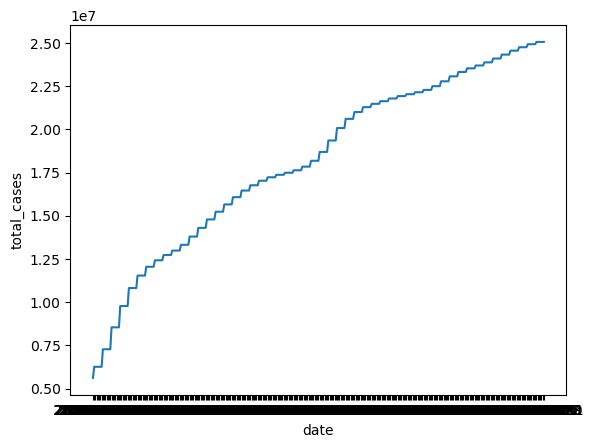

In [48]:
# Filtra i dati per l'Italia nel 2022
italia_2022 = df[(df['location'] == 'Italy') & (df['date'].str[:4] == '2022')]
# Grafico dei casi totali in Italia nel 2022
sns.lineplot(x='date', y='total_cases', data=italia_2022)

In [ ]:
##Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

<Axes: xlabel='location', ylabel='icu_patients'>

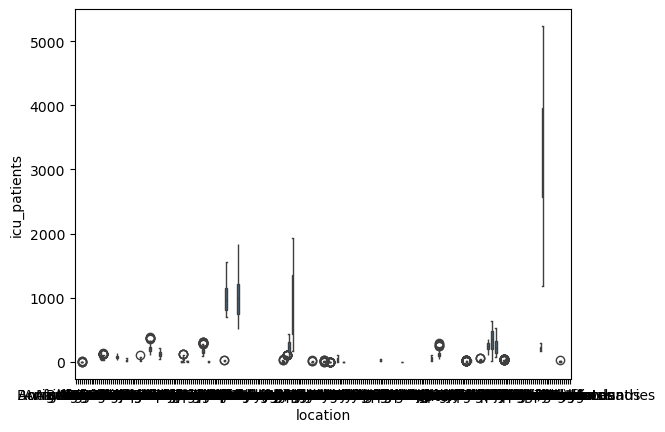

In [42]:
### Filtra i dati per il periodo di interesse
mask = (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')
df_filtrato = df[mask]

# Crea il boxplot e lo mostra direttamente
sns.boxplot(x='location', y='icu_patients', data=df_filtrato)

<Axes: xlabel='location', ylabel='icu_patients'>

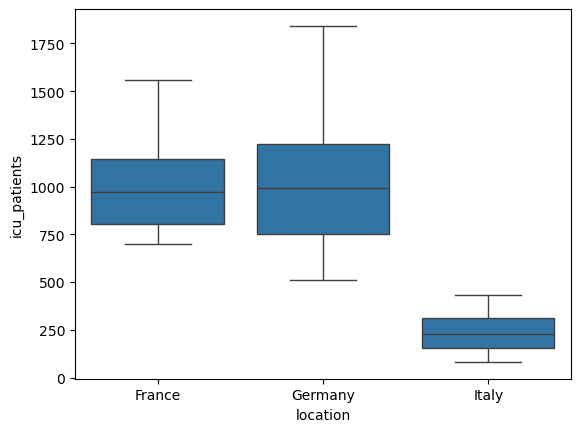

In [46]:
# Filtra i dati per i paesi e il periodo specificato
paesi = ['Italy', 'Germany', 'France']
periodo = df['date'].between('2022-05-01', '2023-04-30')
dati = df[(df['location'].isin(paesi)) & periodo]

# Boxplot dei pazienti in terapia intensiva (con Seaborn)
sns.boxplot(x='location', y='icu_patients', data=dati)